## 31. Computational Vaccine Design for <i>Poxviridae</i> Family Viruses 

1. На Uniprot находим протеом [вируса обезьяней оспы (<i>Monkeypox virus</i>)](https://www.uniprot.org/proteomes/UP000516359), скачиваем в виде архива с FASTA-файлом, распаковываем.

Чуть-чуть информации о самом вирусе: 
1. Краткое название - MPXV.
2. Род <i>Orthopoxvirus</i>.
3. ДНК-вирус.
* <i>В отличие от методички, тут используется референсный протеом вируса.</i>

<i>Пайплайн работы.</i>

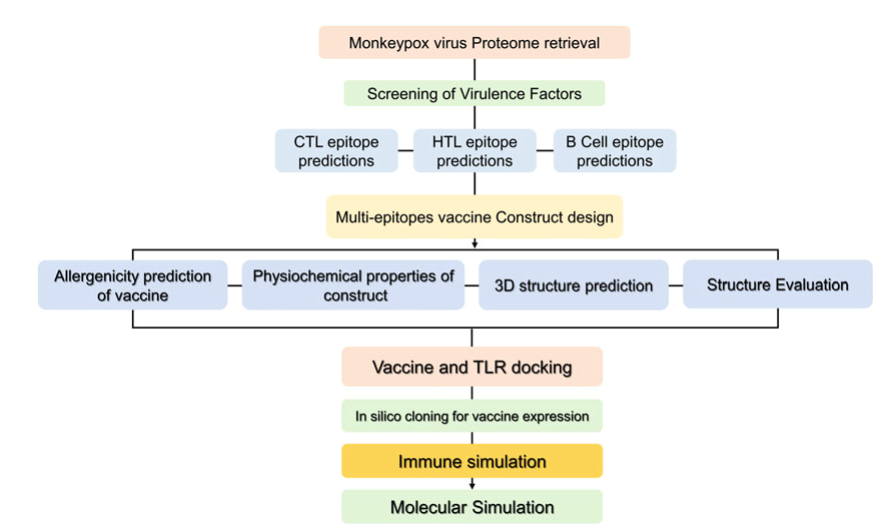

In [3]:
import urllib.request

urllib.request.urlretrieve('https://ftp.uniprot.org/pub/databases/uniprot/current_release/knowledgebase/reference_proteomes/Viruses/UP000516359/UP000516359_10244.fasta.gz', 'virus_proteome.fasta.gz')

('virus_proteome.fasta.gz', <http.client.HTTPMessage at 0x210bf4a12e0>)

2. Проверяем на антигенность с помощью [VaxiJen](http://www.ddg-pharmfac.net/vaxijen/VaxiJen/VaxiJen.html) и на аллергенность с помощью [Allertop v.2](https://www.ddg-pharmfac.net/AllerTOP/) (нужна регистрация).

* Allertop обрабатывает по 100 последовательностей, поэтому разделили файл со 183 белками на две части.

In [7]:
from Bio import SeqIO

records = list(SeqIO.parse("UP000516359_10244.fasta", "fasta"))
with open("proteome_1.fasta", "w") as output_handle:
    SeqIO.write(records[:101], output_handle, "fasta")
with open("proteome_2.fasta", "w") as output_handle:
    SeqIO.write(records[101:], output_handle, "fasta")

VaxiJen: 118 антигенов.

Результат:
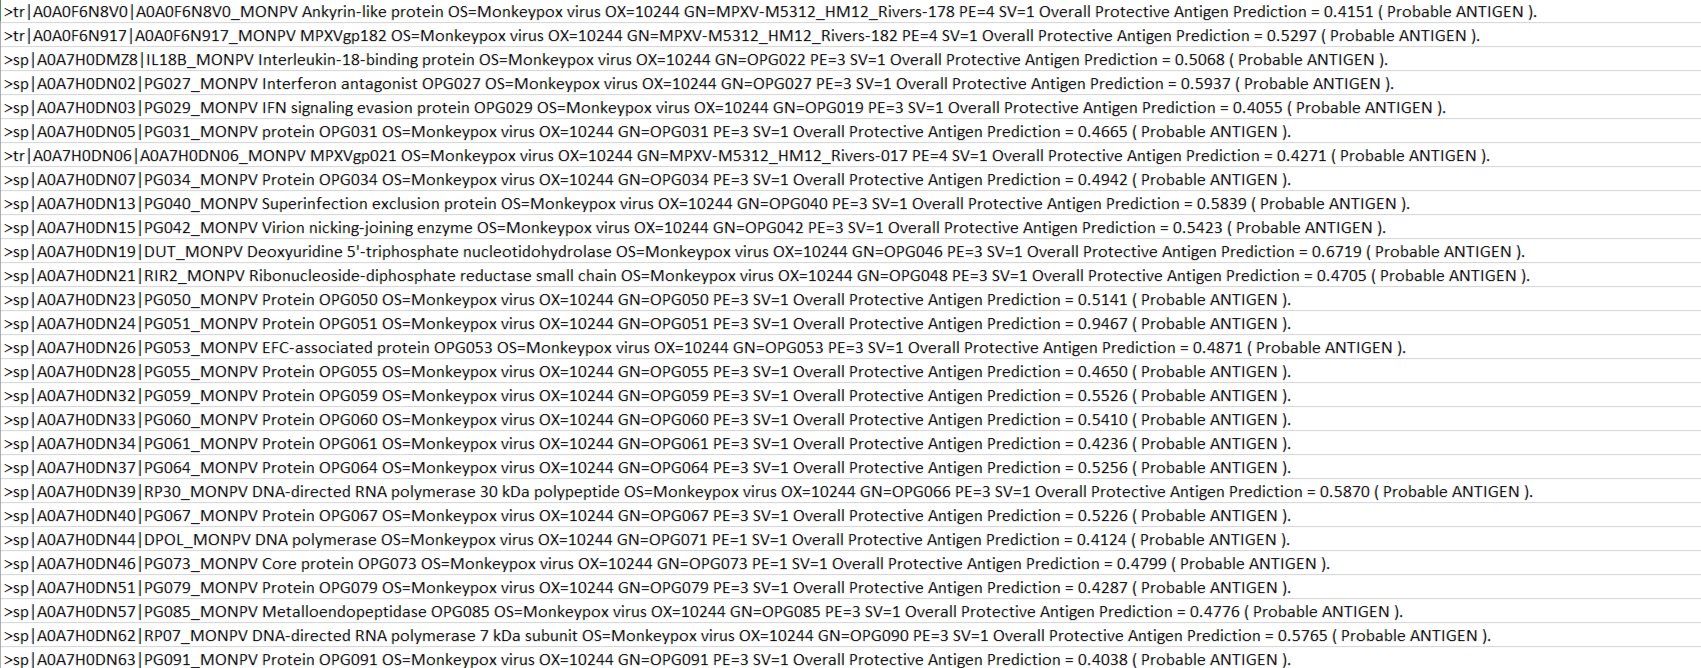

Allertop: 151 не-аллергенов.

Результат:
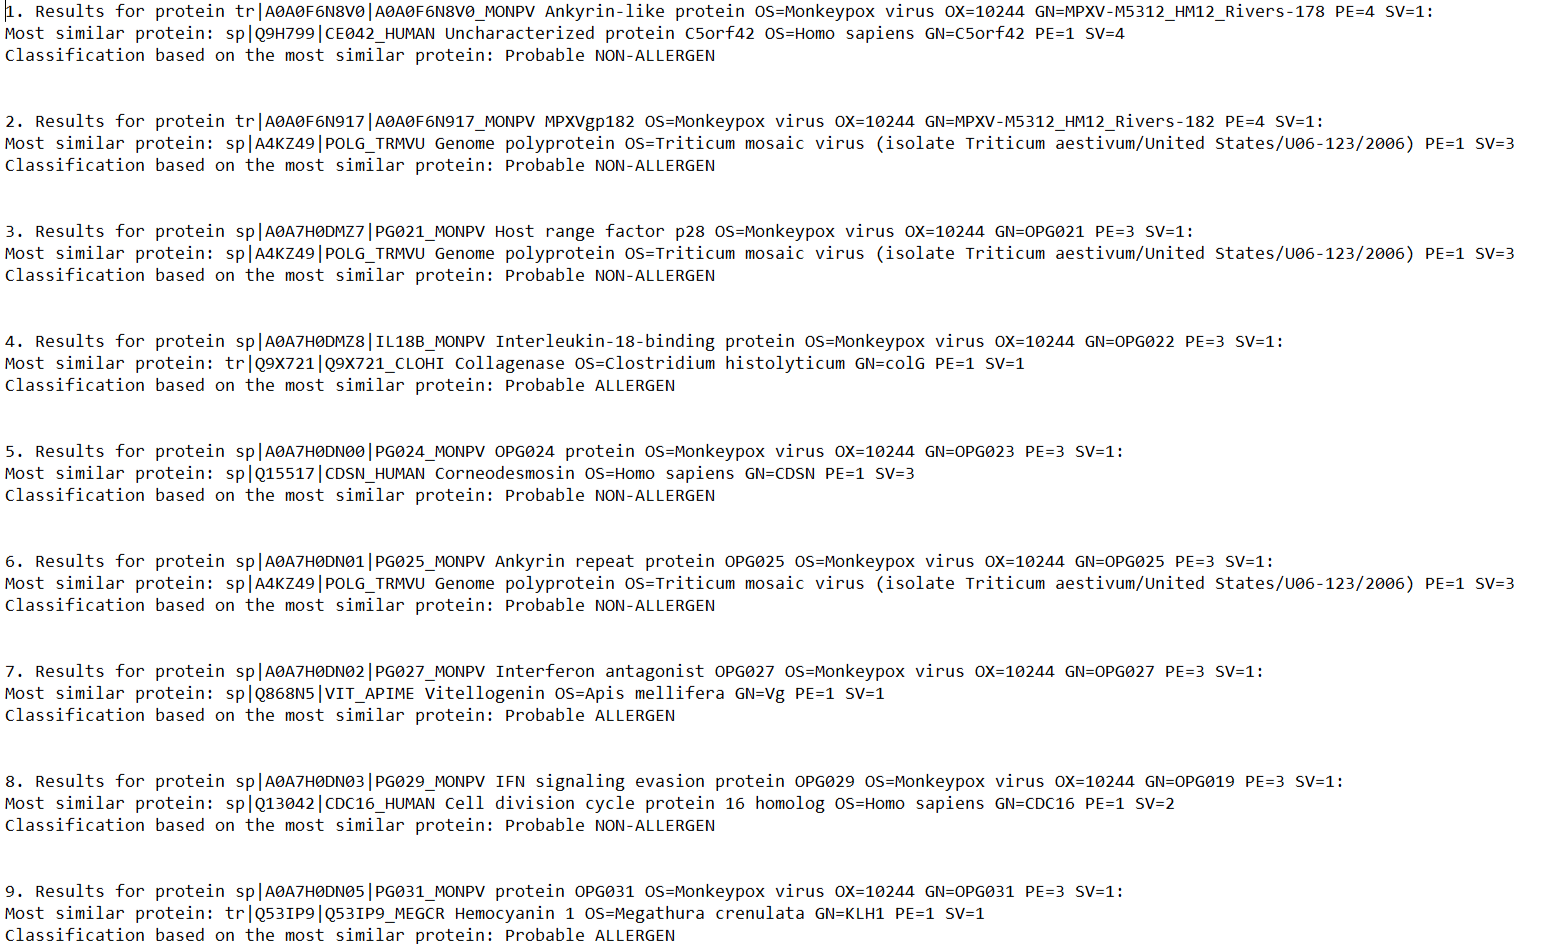

Выбраны белки DNA-directed RNA polymerase 22 kDa subunit (M1L514) и Virion morphogenesis protein OPG132 (A0A7H0DNA4). Оба антигены и не-аллергены.

In [102]:
# для узнавания номера последовательности по названию белка

for record in enumerate(records):
    if "DNA-directed RNA polymerase 22 kDa subunit" in record[1].description or "Virion morphogenesis protein OPG132" in record[1].description:
        print(f'Номер белка: {record[0]}.\nОписание белка: {record[1].description}.\nПоследовательность белка: {record[1].seq}\n') # index

Номер белка: 81.
Описание белка: sp|M1L514|RP22_MONPV DNA-directed RNA polymerase 22 kDa subunit OS=Monkeypox virus OX=10244 GN=OPG103 PE=3 SV=1.
Последовательность белка: MNQYNVKYLAKILCLKTEIARDPYAVINRNVLLRYTTDIEYNDLVTLITVRHKIDSMKTVFQVFNESSINYTPVDDDYGEPIIITSYLQKGHNKFPVNFLYIDVVISDLFPSFVRLDTTETNIVNSVLQTGDGKKTLRLPKMLETEIVVKILYRPNIPLKIVRFFRNNMVTGVEIADRSVISVAD

Номер белка: 144.
Описание белка: sp|A0A7H0DNA4|PG132_MONPV Virion morphogenesis protein OPG132 OS=Monkeypox virus OX=10244 GN=OPG132 PE=1 SV=1.
Последовательность белка: MDKLRVLYDEFVTISKDNLERETGLSASDVDMDFDLNIFMTLVPVLEKKVCVITPTIEDDKIVTMMKYCSYQSFSFWFLKSGAVVKSVYNKLDDVEKEKFVATFRDMLLNVQTLISLNSMYTRLRQDTEDIVSDSKKIIEIVSHLRASTTENAAYQVLQQNNSFIISTLNKILSDENYLLKIIAVFDSKLISEKETLNEYKQLYTISSESLVYGIRCVSNLDISSVQLSNNKYVLFVKKMLPKIILFQNNDINAQQFANVISKIYTLIYRQLTSNVDVGCLLTDTIESTKTKISIEKIKQTGINNVQSLIKFISDNKKEYKTIISEEYLSKEDRIITILQNIVNEHDIKYDNKLLNMRDLIVTFRERYSYKF



3. Предсказание эпитопов: 

1) CTL-эпитопы: с помощью сервиса [NetCTL](https://services.healthtech.dtu.dk/service.php?NetCTL-1.2) загнали выбранные белки (результат п.2). Порог - 0.75; порог на вес обрезки на С-конце - 0.15, значение веса эффективности транспорта TAP - 0.05. Супертипы HLA: A2, A3 и B7 (~88.3% покрытия популяции мира).

In [124]:
import pandas as pd

# CTL-эпитопы
CTL_epitope = pd.read_csv('CTL_epitopes.tsv', sep='\t')
CTL_binders = CTL_epitope[CTL_epitope['binder'] == 'E'].sort_values(by='Prediction_score', ascending=False) # выбираем только "binders" (E) с высоким весом (combined score)
CTL_binders[CTL_binders['Prediction_score'] >= 0.9] # выберем 2 эпитопа одного белка и 2 эпитопа другого белка с самыми высокими весами (т.к. есть ограничения на размер итоговой вакцины в 500 кДа) 

,Residue_number,ID,Protein_identifier,pep,Peptide_sequence,aff(nM),Predicted_MHC_binding_affinity,aff_rescale,Rescale_binding_affinity,cle,C_terminal_cleavage_affinity,tap,TAP_transport_efficiency,COMB(Combined_score),Prediction_score,binder,HLA_supertype
895,72,ID,A0A7H0DNA4,pep,QSFSFWFLK,aff,0.8103,aff_rescale,1.5250,cle,0.7316,tap,0.578,COMB,1.6637,E,A3
258,82,ID,M1L514,pep,IIITSYLQK,aff,0.7149,aff_rescale,1.3455,cle,0.6557,tap,0.540,COMB,1.4708,E,A3
531,6,ID,A0A7H0DNA4,pep,VLYDEFVTI,aff,0.8112,aff_rescale,1.2093,cle,0.9735,tap,0.935,COMB,1.4021,E,A2
184,8,ID,M1L514,pep,YLAKILCLK,aff,0.6590,aff_rescale,1.2402,cle,0.6484,tap,0.582,COMB,1.3665,E,A3
896,40,ID,A0A7H0DNA4,pep,MTLVPVLEK,aff,0.6373,aff_rescale,1.1994,cle,0.9379,tap,0.403,COMB,1.3602,E,A3
354,24,ID,M1L514,pep,YAVINRNVL,aff,0.6242,aff_rescale,1.2042,cle,0.7272,tap,0.920,COMB,1.3593,E,B7
532,172,ID,A0A7H0DNA4,pep,ILSDENYLL,aff,0.7789,aff_rescale,1.1611,cle,0.9455,tap,1.094,COMB,1.3576,E,A2
897,78,ID,A0A7H0DNA4,pep,FLKSGAVVK,aff,0.6418,aff_rescale,1.2078,cle,0.8326,tap,0.331,COMB,1.3493,E,A3
898,181,ID,A0A7H0DNA4,pep,KIIAVFDSK,aff,0.6204,aff_rescale,1.1677,cle,0.8618,tap,0.817,COMB,1.3378,E,A3
533,71,ID,A0A7H0DNA4,pep,YQSFSFWFL,aff,0.7756,aff_rescale,1.1561,cle,0.7172,tap,1.060,COMB,1.3167,E,A2


In [126]:
# сколько CTL-эпитопов вышло всего

CTL_binders[CTL_binders['Prediction_score'] >= 0.9].groupby('Protein_identifier').count()['pep']

Protein_identifier
A0A7H0DNA4    29
M1L514        14
Name: pep, dtype: int64

2) HTL-эпитопы (HTL-эпитопы предназначены для стимуляции гуморального иммунного ответа через рецепторы MHC-II): с помощью сервиса [MHCII](https://tools.iedb.org/mhcii/) в БД IEDB загнали весь протеом, выбрали нужные аллели (HLA-DRB1 * 03:01, HLA-DRB1 * 15:01, HLA-DRB3 * 01:01, HLA-DRB3 * 02, 02, HLA-DRB4 * 01:01, HLA-DRB5 * 01:01) (параметры по умолчанию) и получили csv-таблички и последовательности эпитопов. Выбираем находки с низким отранжированным перцентилем.

* Тут немного подправила FASTA-файл, потому что сервиса почему-то не устраивает формат содержимого.

In [173]:
# HTL-эпитопы

HTL_epitope = pd.read_csv('MHCII_HTL.csv')
HTL_epitope['Percentile Rank'] = HTL_epitope.score.rank(pct = True) # расчёт ранжированного перцентиля
HTL_epitope_sorted = HTL_epitope.sort_values(by='Percentile Rank', ascending=True)
HTL_epitope_sorted[(HTL_epitope_sorted['seq_num'] == 81) | (HTL_epitope_sorted['seq_num'] == 144)].head(50)

,allele,seq_num,start,end,length,core_peptide,peptide,score,rank,Percentile Rank
313636,HLA-DRB3*01:01,81,30,44,15,AKSKFPRSM,IAGAKSKFPRSMLSI,0.0001,100.0,0.009652
301765,HLA-DRB3*02:02,81,31,45,15,SKFPRSMLS,AGAKSKFPRSMLSIF,0.0001,96.0,0.009652
301444,HLA-DRB3*02:02,81,133,147,15,PILCIFETR,RQGSSPILCIFETRK,0.0001,96.0,0.009652
307651,HLA-DRB3*02:02,81,132,146,15,QGSSPILCI,FRQGSSPILCIFETR,0.0001,98.0,0.009652
311485,HLA-DRB5*01:01,81,132,146,15,RQGSSPILC,FRQGSSPILCIFETR,0.0001,99.0,0.009652
311092,HLA-DRB3*01:01,81,31,45,15,FPRSMLSIF,AGAKSKFPRSMLSIF,0.0001,99.0,0.009652
310913,HLA-DRB3*01:01,81,116,130,15,PKKSGRRKN,VIPKKSGRRKNKNMV,0.0001,99.0,0.009652
310825,HLA-DRB1*03:01,81,132,146,15,SSPILCIFE,FRQGSSPILCIFETR,0.0001,99.0,0.009652
310786,HLA-DRB3*01:01,81,29,43,15,IAGAKSKFP,VIAGAKSKFPRSMLS,0.0001,99.0,0.009652
310692,HLA-DRB3*01:01,144,118,132,15,SCPIVIEKN,IEEGSCPIVIEKNGE,0.0001,99.0,0.009652


3) B-клеточные эпитопы: с помощью сервиса <s>[ABCPred](https://webs.iiitd.edu.in/raghava/abcpred/ABC_submission.html) (т.к. он принимает запросы по одному белку, а не по всему протеому, как заявлено на сервисе)</s> [BepiPred 2.0](https://services.healthtech.dtu.dk/service.php?BepiPred-2.0) загоняем весь протеом, оставляем параметры по умолчанию (порог равен 0.50), собираем последовательность эпитопов.

In [ ]:
# B-клеточные эпитопы
# делим по 50 белков специально для BepiPred 2.0

with open("proteome_1.fasta", "w") as output_handle:
    SeqIO.write(records[:50], output_handle, "fasta")
with open("proteome_2.fasta", "w") as output_handle:
    SeqIO.write(records[51:100], output_handle, "fasta")
with open("proteome_3.fasta", "w") as output_handle:
    SeqIO.write(records[101:150], output_handle, "fasta")
with open("proteome_4.fasta", "w") as output_handle:
    SeqIO.write(records[151:], output_handle, "fasta")

In [146]:
# B-клеточные эпитопы
B_cell_epitope = pd.read_csv('bepipred_results.csv')
BCE_filtered = B_cell_epitope[B_cell_epitope['EpitopeProbability'] >= 0.50]
BCE_filtered['diffgroup'] = (BCE_filtered['Position'].diff() != 1).cumsum() # делаем группировку по соседним позициям
BCE_filtered['epitope_seqs'] = BCE_filtered.groupby(['Entry', 'diffgroup'])['AminoAcid'].transform(lambda x : ''.join(x)) # соединяем отдельные аминокислоты в единую последовательность
BCE_filtered = BCE_filtered.drop_duplicates('epitope_seqs')
BCE_df = BCE_filtered[BCE_filtered['epitope_seqs'].str.len() != 1][['Entry', 'epitope_seqs']]
BCE_df.to_csv('B-cell-epitopes.csv', index=False)
BCE_df[(BCE_df['Entry'] == 'sp_M1L514_RP22_MONPV') | (BCE_df['Entry'] == 'sp_A0A7H0DNA4_PG132_MONPV')]

C:\Users\Я\AppData\Local\Temp\ipykernel_25576\787848016.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BCE_filtered['diffgroup'] = (BCE_filtered['Position'].diff() != 1).cumsum() # делаем группировку по соседним позициям
C:\Users\Я\AppData\Local\Temp\ipykernel_25576\787848016.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BCE_filtered['epitope_seqs'] = BCE_filtered.groupby(['Entry', 'diffgroup'])['AminoAcid'].transform(lambda x : ''.join(x)) # соединяем отдельные аминокислоты в единую последовател

,Entry,epitope_seqs
26404,sp_M1L514_RP22_MONPV,NVKYLAK
26413,sp_M1L514_RP22_MONPV,CLKTEIARDPYAVINRNVLLRYTTDIEYNDLVTLITVRHKIDSMKT...
26485,sp_M1L514_RP22_MONPV,SYLQKGHNKFP
26510,sp_M1L514_RP22_MONPV,PSFVRLDTTETNIVNSVLQTGDGK
26563,sp_M1L514_RP22_MONPV,FFRNNMVTGVEIADRSVIS
45219,sp_A0A7H0DNA4_PG132_MONPV,RVLYDEFVTISKDNLERETGLSASDVDMDFDLNIFMTLVPVLEKKV...
45315,sp_A0A7H0DNA4_PG132_MONPV,VATFRDMLLNVQTLISLNSMYTRLRQDTEDIVSDSKKIIEIVSHLR...
45399,sp_A0A7H0DNA4_PG132_MONPV,VFDSKLISEKETLNEYKQLYTISSESLVYGIRCVSNLDISSVQLSNNKY
45458,sp_A0A7H0DNA4_PG132_MONPV,IILFQNNDINAQQFANVISKIYTLIYRQLTSNVDVGCLLTDTIEST...


In [148]:
BCE_filtered[(BCE_filtered['Entry'] == 'sp_M1L514_RP22_MONPV') | (BCE_filtered['Entry'] == 'sp_A0A7H0DNA4_PG132_MONPV')]

,Entry,Position,AminoAcid,Exposed/Buried,RelativeSurfaceAccessilibity,HelixProbability,SheetProbability,CoilProbability,EpitopeProbability,diffgroup,epitope_seqs
26404,sp_M1L514_RP22_MONPV,5,N,E,0.383,0.118,0.150,0.732,0.522222,836,NVKYLAK
26413,sp_M1L514_RP22_MONPV,14,C,B,0.231,0.184,0.043,0.773,0.501111,837,CLKTEIARDPYAVINRNVLLRYTTDIEYNDLVTLITVRHKIDSMKT...
26485,sp_M1L514_RP22_MONPV,86,S,E,0.381,0.113,0.043,0.844,0.518333,838,SYLQKGHNKFP
26510,sp_M1L514_RP22_MONPV,111,P,B,0.107,0.052,0.084,0.864,0.507333,840,PSFVRLDTTETNIVNSVLQTGDGK
26563,sp_M1L514_RP22_MONPV,164,F,B,0.174,0.455,0.046,0.498,0.506556,841,FFRNNMVTGVEIADRSVIS
45219,sp_A0A7H0DNA4_PG132_MONPV,5,R,E,0.301,0.125,0.227,0.648,0.524778,1441,RVLYDEFVTISKDNLERETGLSASDVDMDFDLNIFMTLVPVLEKKV...
45315,sp_A0A7H0DNA4_PG132_MONPV,101,V,B,0.167,0.191,0.086,0.723,0.507333,1442,VATFRDMLLNVQTLISLNSMYTRLRQDTEDIVSDSKKIIEIVSHLR...
45399,sp_A0A7H0DNA4_PG132_MONPV,185,V,B,0.230,0.191,0.086,0.723,0.507333,1443,VFDSKLISEKETLNEYKQLYTISSESLVYGIRCVSNLDISSVQLSNNKY
45458,sp_A0A7H0DNA4_PG132_MONPV,244,I,B,0.194,0.191,0.086,0.723,0.509889,1444,IILFQNNDINAQQFANVISKIYTLIYRQLTSNVDVGCLLTDTIEST...


4. Конструирование мультиэпитопной мультисубъединичной вакцины:

Предсказанные CTL-, HTL- и BCL-эпитопы (каждого вида эпитопа в составе вакцины несколько штук) связываем друг с другом при помощи линкеров (AYY, GPGPG и KK, соответственно).

Адъювант: GIINTLQKYYCRVRGGRCAVLSCLPKEEQIGKCSTRGRKCCRRKK

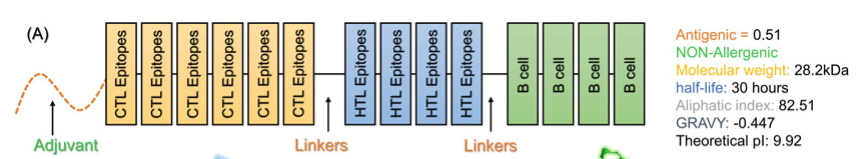

In [185]:
# результирующая табличка

selected_epitopes = pd.DataFrame({'Protein name': ['DNA-directed RNA polymerase 22 kDa subunit', 'Virion morphogenesis protein OPG132'],
                                  'Protein_sequence': [str(records[81].seq), str(records[144].seq)], # полная последовательность белка
                                  'Antigenicity': ['0.4754 / antigenic', '0.4193 / antigenic'], # вес и результат предсказания
                                  'Allergenicity': ['Non-allergen', 'Non-allergen'],
                                  'Selected CTL epitopes': [['YQSFSFWFL (1.3167)', 'MLLNVQTLI (1.2556)', 'VLYDEFVTI (1.4021)', 'ILSDENYLL (1.3576)', 'ISLNSMYTR (0.9385)'], # comb_pred_score
                                                            ['IIITSYLQK (1.4708)', 'YLAKILCLK (1.3665)']], # вес
                                  'Selected HTL epitopes': [['IAGAKSKFPRSMLSI (30-44, 0.009652)', 'VIAGAKSKFPRSMLS (29-43, 0.009652)', 'YFLDPNNEVMPLIIN (95-109, 0.043053)', 'IFRQGSSPILCIFET (131-145, 0.025365)'],
                                                            ['LLQRGRLPLVSEFSD (89-103, 0.025365)', 'LQRGRLPLVSEFSDE (90-104, 0.043053)']], # позиции пептида и отранжированный перцентиль
                                  'Selected BCL epitopes': [['PSFVRLDTTETNIVNSVLQTGDGK (111-134)'], # позиции
                                                            ['IILFQNNDINAQQFANVISKIYTLIYRQLTSNVDVGCLLTDTIESTKTKISIEKIKQTGINNVQSLIKFISDNKKEYKTIISEEYLSKEDRIITILQNIVNEHDIKYDNKLLNMRDLIVTFRERYS (244-369)']]})
selected_epitopes

,Protein name,Protein_sequence,Antigenicity,Allergenicity,Selected CTL epitopes,Selected HTL epitopes,Selected BCL epitopes
0,DNA-directed RNA polymerase 22 kDa subunit,MNQYNVKYLAKILCLKTEIARDPYAVINRNVLLRYTTDIEYNDLVT...,0.4754 / antigenic,Non-allergen,"[YQSFSFWFL (1.3167), MLLNVQTLI (1.2556), VLYDE...","[IAGAKSKFPRSMLSI (30-44, 0.009652), VIAGAKSKFP...",[PSFVRLDTTETNIVNSVLQTGDGK (111-134)]
1,Virion morphogenesis protein OPG132,MDKLRVLYDEFVTISKDNLERETGLSASDVDMDFDLNIFMTLVPVL...,0.4193 / antigenic,Non-allergen,"[IIITSYLQK (1.4708), YLAKILCLK (1.3665)]","[LLQRGRLPLVSEFSD (89-103, 0.025365), LQRGRLPLV...",[IILFQNNDINAQQFANVISKIYTLIYRQLTSNVDVGCLLTDTIES...


In [189]:
# вставка между доменами с эпитопами линкеров

# AYY, GPGPG и KK - линкеры
# EAAAK - значился в заметках
vaccine_1 = 'AYY YQSFSFWFL AYY MLLNVQTLI AYY VLYDEFVTI AYY ILSDENYLL GPGPG AYY ISLNSMYTR GPGPG IAGAKSKFPRSMLSI GPGPG VIAGAKSKFPRSMLS GPGPG YFLDPNNEVMPLIIN GPGPG IFRQGSSPILCIFET KK PSFVRLDTTETNIVNSVLQTGDGK'.replace(' ', '')
vaccine_2 = 'AYY IIITSYLQK AYY YLAKILCLK GPGPG LLQRGRLPLVSEFSD GPGPG LQRGRLPLVSEFSDE KK IILFQNNDINAQQFANVISKIYTLIYRQLTSNVDVGCLLTDTIESTKTKISIEKIKQTGINNVQSLIKFISDNKKEYKTIISEEYLSKEDRIITILQNIVNEHDIKYDNKLLNMRDLIVTFRERYS'.replace(' ', '')

adjuvant = 'GIINTLQKYYCRVRGGRCAVLSCLPKEEQIGKCSTRGRKCCRRKK' # из заметок

vaccine_1 = adjuvant + vaccine_1
vaccine_2 = adjuvant + vaccine_2

5. Физико-химические свойства.

С помощью [ExPASy ProtParam](https://web.expasy.org/protparam/) расчитываем мол. массу, алифатический индекс и другие характеристики физ.-хим. свойств.

* Примерно 15-20 итераций точно понадобилось, чтобы вывести II на значение меньше 40. Для второй вакцины всё оказалось проще и быстрее (три итерации).

In [186]:
pd.DataFrame({'Вакцины': [vaccine_1, vaccine_2],
              'Длины': [len(vaccine_1), len(vaccine_2)],
              'MW (kDa)': [23.87, 27.23], # надо, чтобы была мол. масса меньше 500 кДа (требования эксперимента)
              'GRAVY (Grand average of hydropathicity)': [-0.106, -0.328],
              'AI': [81.25, 101.98],
              'Теор. pI': [9.46, 9.50],
              'Instability index (II)': [39.64, 39.20]}) # < 40 - stable protein

,Вакцины,Длины,MW (kDa),GRAVY (Grand average of hydropathicity),AI,Теор. pI,Instability index (II)
0,GIINTLQKYYCRVRGGRCAVLSCLPKEEQIGKCSTRGRKCCRRKKA...,216,23.87,-0.106,81.25,9.46,39.64
1,GIINTLQKYYCRVRGGRCAVLSCLPKEEQIGKCSTRGRKCCRRKKA...,237,27.23,-0.328,101.98,9.50,39.20


6. Моделирование с помощью [Robetta](https://robetta.bakerlab.org/) (нужна регистрация) сконструированной вакцины + валидация с помощью <s>[ProSA-web](https://prosa.services.came.sbg.ac.at/prosa.php) (почему-то не хочет работать)</s> MolProbity (только этот сервис удаляет водороды, поэтому перед анализом их необходимо добавить).

* Сайт с RAMPAGE недоступен.

Результаты: [структура 1](https://robetta.bakerlab.org/results.php?id=696667), [структура 2](https://robetta.bakerlab.org/results.php?id=696670).

Валидация: 

1) http://molprobity.biochem.duke.edu/index.php?MolProbSID=emd9s8iner9od10fpcccpmdrp3&eventID=104, http://molprobity.biochem.duke.edu/index.php?MolProbSID=uk1chj61i53ua5atge4nhs8c20&eventID=104, http://molprobity.biochem.duke.edu/index.php?MolProbSID=t7a6f3upgihao0pql833depl26&eventID=104, http://molprobity.biochem.duke.edu/index.php?MolProbSID=656hlml9ded8gciju7nrdl3fs1&eventID=104, http://molprobity.biochem.duke.edu/index.php?MolProbSID=9lg7q0bjd7v9egrlofgtabqj03&eventID=104 - здесь третья и пятая модель более-менее вышли (однако, есть отличия в показателях clashscore, bad bonds, появление не цис-пролина, отличия в выбросах по разрешению). Возьмём третью модельку.

2) http://molprobity.biochem.duke.edu/viewtable.php?MolProbSID=efh7buunb9k76o37rlm5ghh4f6&file=/mental-data/rlab/MolProbities/MolProbity20230218_4.7.0/molprobity/public_html/data/efh7buunb9k76o37rlm5ghh4f6/raw_data/full_model_696667_1_1FH-multi.table, http://molprobity.biochem.duke.edu/index.php?MolProbSID=8lhqrfhhe8k35q5rjmt4m5lh00&eventID=104, http://molprobity.biochem.duke.edu/index.php?MolProbSID=tq53t08gvg361nmipspfts7b46&eventID=104, http://molprobity.biochem.duke.edu/index.php?MolProbSID=cmu73ap1thgmm1ric7tds5u2l2&eventID=104 - третья модель хорошо вышла, судя по результатам.

In [207]:
from Bio.PDB import *
import py3Dmol as p3d

view = p3d.view()
view.addModel(open('vaccine_1/full_model_696667_3.pdb', 'r').read(),'pdb')
view.setBackgroundColor('white')
view.setStyle({'cartoon': {'color':'purple'}})
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [ ]:
view.addModel(open('vaccine_2/full_model_696670_3.pdb', 'r').read(),'pdb')
view.setBackgroundColor('white')
view.setStyle({'cartoon': {'color':'green'}})
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

7. Докинг с помощью <s>[HDOCK](http://hdock.phys.hust.edu.cn/)</s> [ZDOCK](https://zdock.wenglab.org/).

Структура TLR: 6NIH (PDB ID). TLR выступает в качестве рецептора, а сконструированные вакцины - лигандами.

In [ ]:
#p = PDBParser()
#structure = p.get_structure("6NIH", "6NIH.pdb")

# комплекс TLR с первой молекулой
view.addModel(open('vaccine_1/complex.1.pdb', 'r').read(),'pdb')
view.setBackgroundColor('white')
view.setStyle({'chain':'A'}, {'cartoon': {'color':'blue'}})
view.setStyle({'chain':'B'}, {'cartoon': {'color':'lightgreen'}})
view.show()

In [ ]:
# комплекс TLR со второй молекулой
view.addModel(open('vaccine_2/complex.2.pdb', 'r').read(),'pdb')
view.setBackgroundColor('white')
view.setStyle({'chain':'A'}, {'cartoon': {'color':'blue'}})
view.setStyle({'chain':'B'}, {'cartoon': {'color':'pink'}})
view.show()

8. Генная инженерия: оптимизация кодонов с помощью <s>[JCat](http://www.jcat.de/) (у них или проблемы с сервером, или закончилась поддержка сервиса) [GenScript Codon Optimization Tool](https://www.genscript.com/tools/gensmart-codon-optimization) (нужна регистрация, и они не отдают результаты без заказа (хотя пишут про полностью бесплатный сервис))</s> [PeptiCloud](https://www.pepticloud.com/codon-optimization-result) и клонирование в экспрессионный вектор pET-28a (+) <i>E. coli</i> <i>in silico</i>.

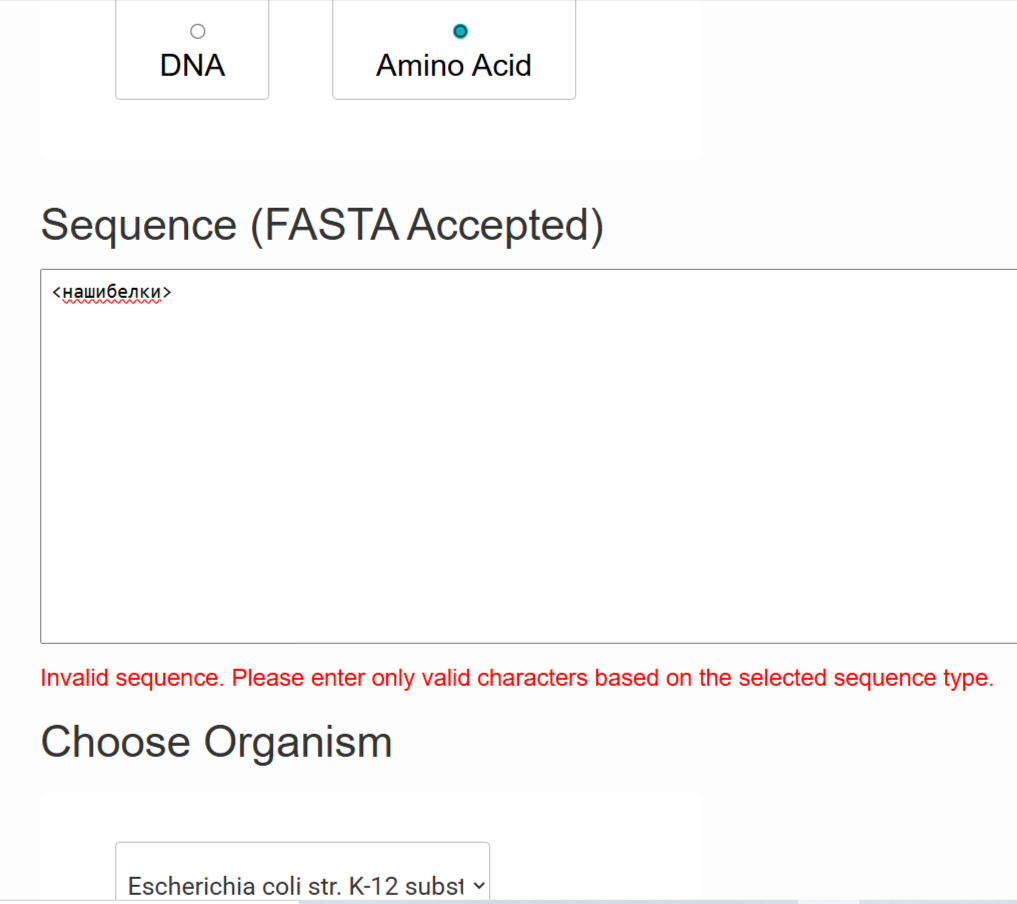

* SnapGene не работает у меня, поэтому воспользуемся [Benchling](https://www.benchling.com/).

Карту плазмиды выкачиваем из AddGene (к сожалению, карта данной плазмиды недоступна, поэтому воспользуемся картой [вектора pET-28a (+)-hTBP](https://www.addgene.org/browse/sequence/335496/)).

Сборка Гиббсона:
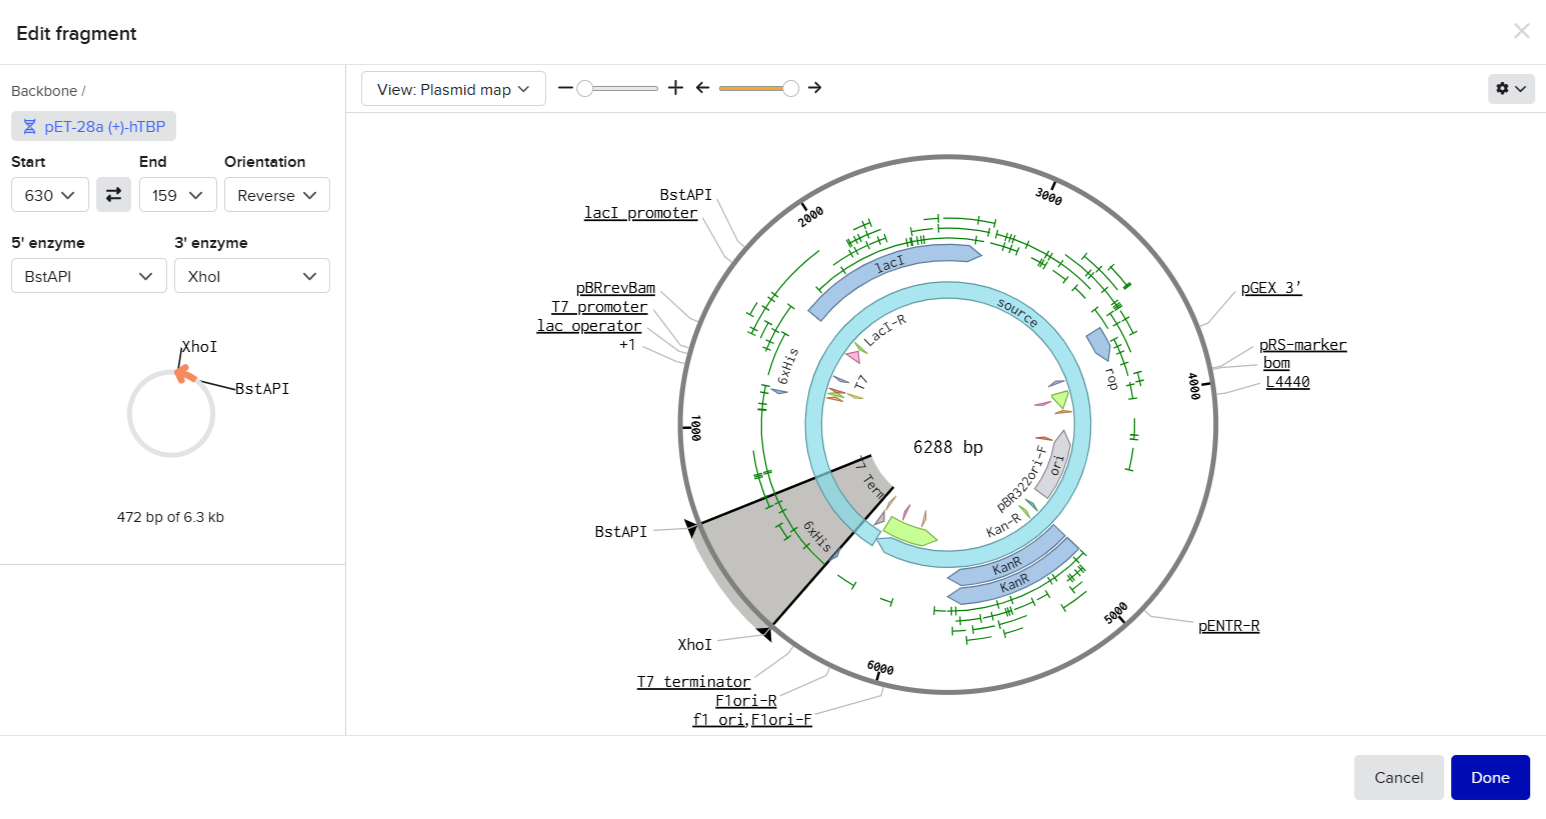

Параметры:
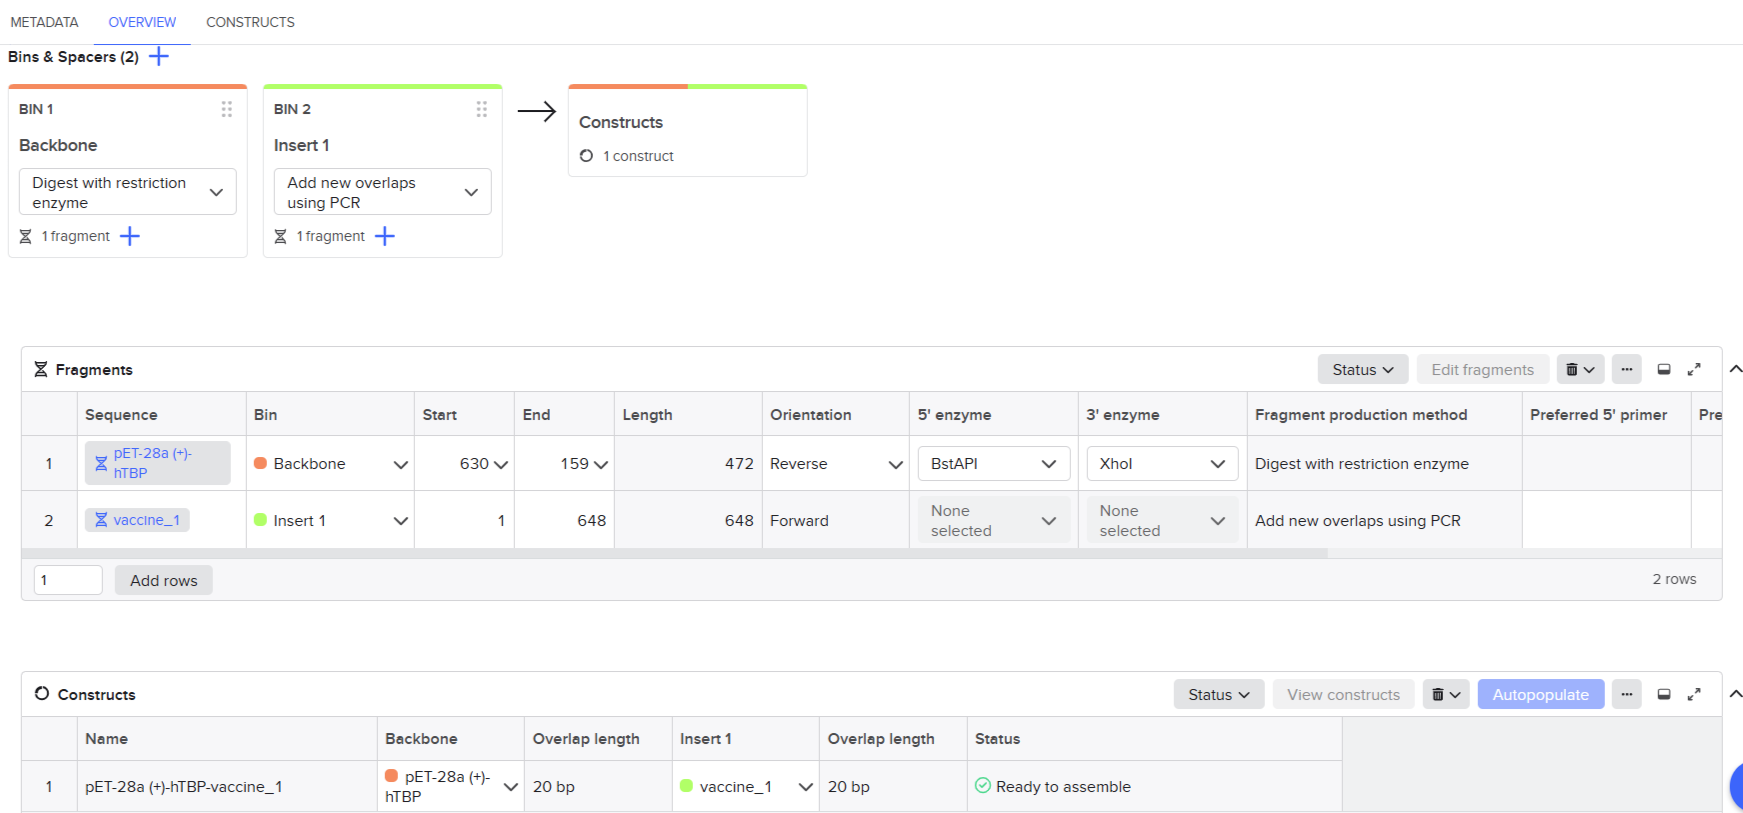

Собранные генетические конструкции:

1) 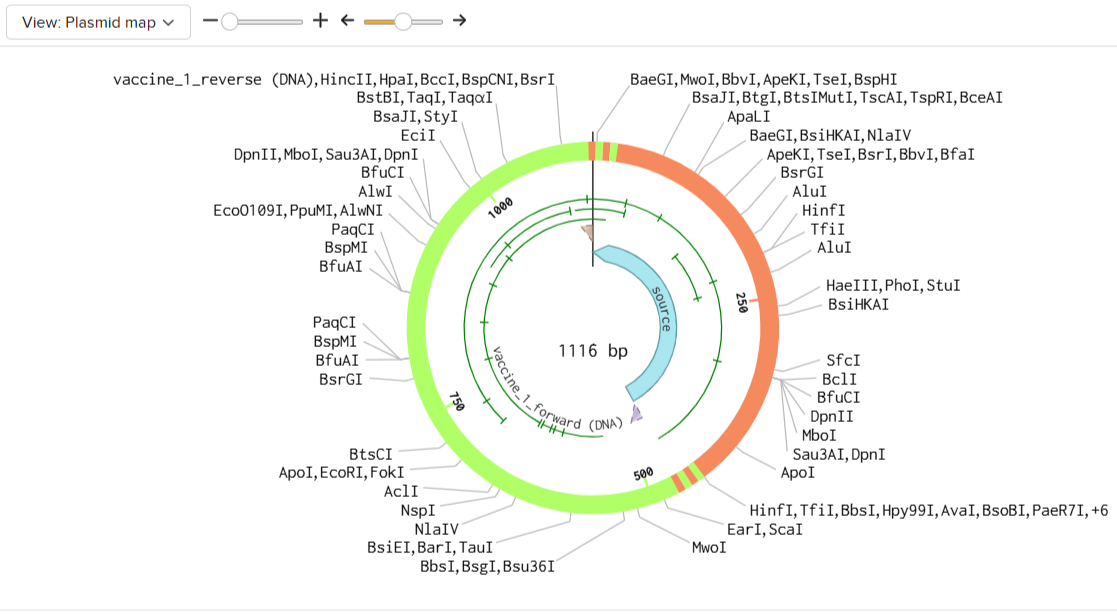

2) 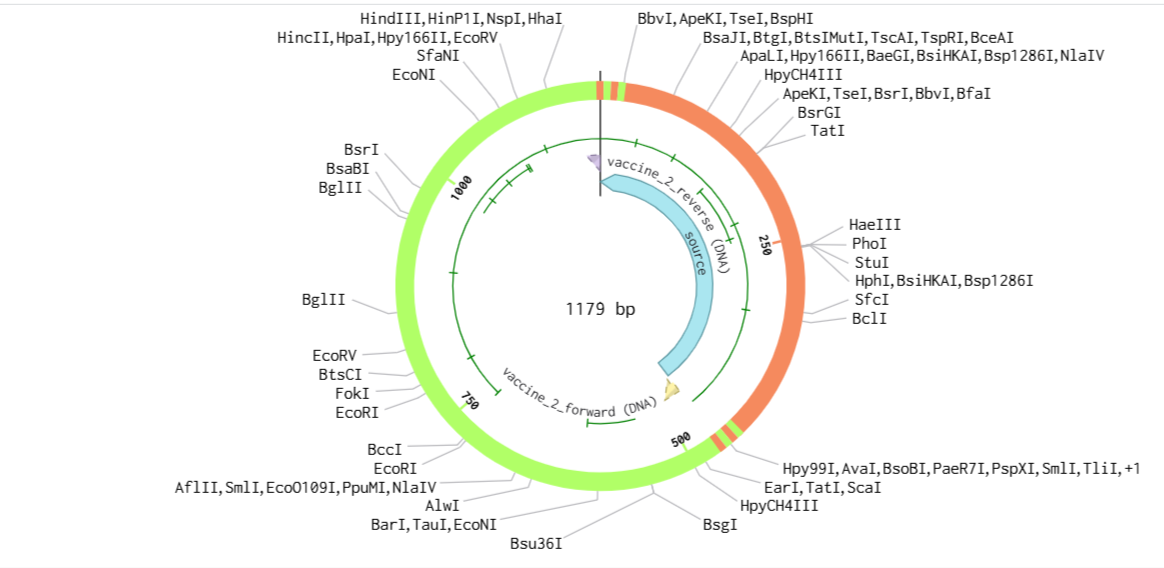

In [196]:
DNA_sequences = list(SeqIO.parse("vaccines_optimized-DNA-Sequence.fasta", "fasta"))

for record in DNA_sequences:
    print(record.id, record.seq, sep='\n') 

vaccine_1
GGTATCATCAACACTCTTCAAAAGTACTACTGTCGCGTTCGCGGTGGTCGCTGTGCAGTTCTTTCATGTCTTCCTAAGGAAGAACAAATCGGTAAGTGTTCAACTCGCGGTCGCAAGTGTTGTCGCCGCAAGAAGGCATACTACTACCAATCATTCTCATTCTGGTTCCTTGCATACTACATGCTTCTTAACGTTCAAACTCTTATCGCATACTACGTTCTTTACGATGAATTCGTTACTATCGCATACTACATCCTTTCAGATGAAAACTACCTTCTTGGTCCTGGTCCTGGTGCATACTACATCTCACTTAACTCAATGTACACTCGCGGTCCTGGTCCTGGTATCGCAGGTGCAAAGTCAAAGTTCCCTCGCTCAATGCTTTCAATCGGTCCTGGTCCTGGTGTTATCGCAGGTGCAAAGTCAAAGTTCCCTCGCTCAATGCTTTCAGGTCCTGGTCCTGGTTACTTCCTTGATCCTAACAACGAAGTTATGCCTCTTATCATCAACGGTCCTGGTCCTGGTATCTTCCGCCAAGGTTCATCACCTATCCTTTGTATCTTCGAAACTAAGAAGCCTTCATTCGTTCGCCTTGATACTACTGAAACTAACATCGTTAACTCAGTTCTTCAAACTGGTGATGGTAAG
vaccine_2
GGTATCATCAACACTCTTCAAAAGTACTACTGTCGCGTTCGCGGTGGTCGCTGTGCAGTTCTTTCATGTCTTCCTAAGGAAGAACAAATCGGTAAGTGTTCAACTCGCGGTCGCAAGTGTTGTCGCCGCAAGAAGGCATACTACATCATCATCACTTCATACCTTCAAAAGGCATACTACTACCTTGCAAAGATCCTTTGTCTTAAGGGTCCTGGTCCTGGTCTTCTTCAACGCGGTCGCCTTCCTCTTGTTTCAGAATTCTCAGATGGTCCTGGTCCTGGTCTTCAACGCGGTCGCCTTCCTCTTGTTTCAGAATTCTCAGATGAAAAGA

9. [Симуляция иммунного ответа](https://kraken.iac.rm.cnr.it/C-IMMSIM/index.php?page=1).

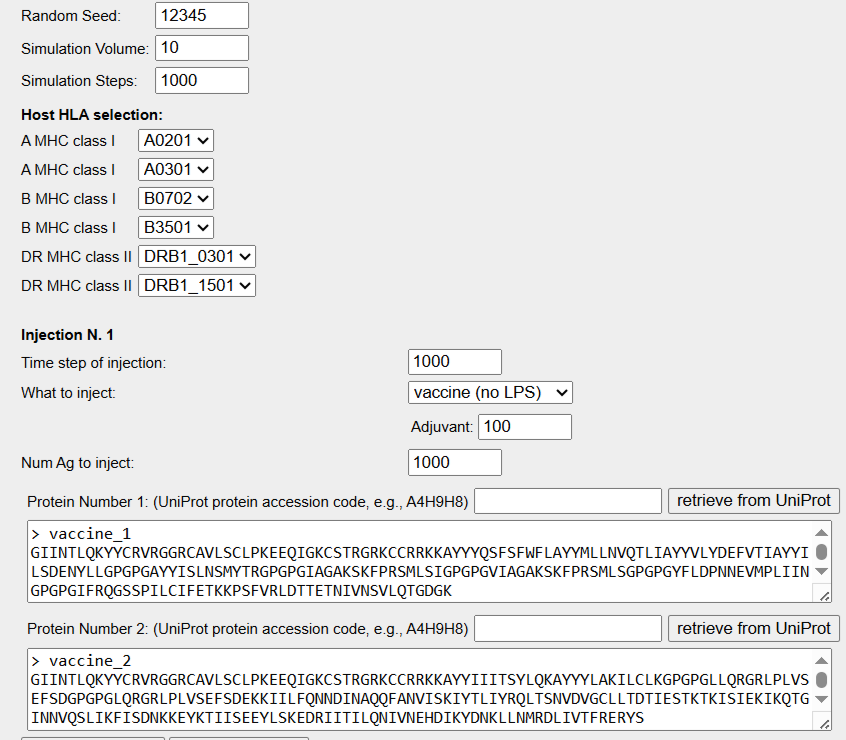

Результат: в pdf-файле (immsim_results_final.pdf).

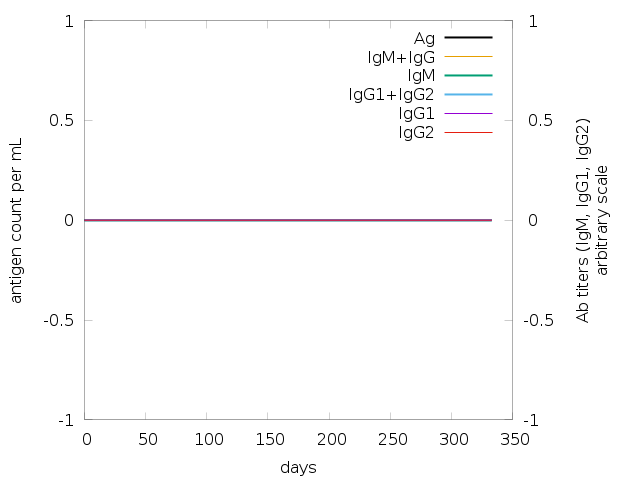

/возможно, что я что-то не так сделала, отчего не показывается уровень иммуноглобулинов и цитокинов/